# LAB 1 - READ AND EXPLORE DATA
<br/>

## IMPORT LIBRARIES

In [8]:
library(tidyverse)
library(ggplot2)
library(ggalt)
library(quantmod)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


ERROR: Error in library(ggalt): there is no package called ‘ggalt’


In [39]:
install.packages("devtools")
devtools::install_github("hrbrmstr/ggalt")

also installing the dependencies ‘ps’, ‘processx’, ‘ini’, ‘desc’, ‘callr’, ‘cli’, ‘xopen’, ‘clisymbols’, ‘fs’, ‘gh’, ‘git2r’, ‘memoise’, ‘pkgbuild’, ‘pkgload’, ‘rcmdcheck’, ‘remotes’, ‘sessioninfo’, ‘usethis’

Warning message in install.packages("devtools"):
“installation of package ‘ps’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘fs’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘git2r’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘processx’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘callr’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘xopen’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘usethis’ had non-zero exit status”Warning message in install.packages("devto

ERROR: Error in loadNamespace(name): there is no package called ‘devtools’


## HELPER FUNCTIONS

### FUNCTION TO READ CSV FILES

The Data Path has the directory of pattern `/<home>/data/<data dir>/<data file>`

In [2]:
DataFile <- function(dataDir, dataFilename)
{
    home.dir <- Sys.getenv('HOME')
    data.path <- paste(home.dir,'data', dataDir, dataFilename, sep = '/')
    data.path
}

dataDir <- 'airlines_data'
dataFilename <- 'flights.csv'
flights.data <- DataFile('airlines_data','flights.csv')

### FUNCTIONS TO STREAM STOCK DATA

### FUNCTION TO READ DATA FROM MYSQL

## READ DATA FILES

In [3]:
airlinesDirName <- 'airlines_data'
flights.data <- DataFile(airlinesDirName,'flights.csv')
airlines.data <- DataFile(airlinesDirName, 'airlines.csv')
airports.data <- DataFile(airlinesDirName, 'airports.csv')

flights.data <- read.csv(flights.data)
airlines.data <- read.csv(airlines.data)
airports.data <- read.csv(airports.data)

Inspect Data

In [4]:
head(flights.data)

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,⋯,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2015,1,1,4,AS,98,N407AS,ANC,SEA,5,⋯,408,-22,0,0,,NA,NA,NA,NA,NA
2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,⋯,741,-9,0,0,,NA,NA,NA,NA,NA
2015,1,1,4,US,840,N171US,SFO,CLT,20,⋯,811,5,0,0,,NA,NA,NA,NA,NA
2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,⋯,756,-9,0,0,,NA,NA,NA,NA,NA
2015,1,1,4,AS,135,N527AS,SEA,ANC,25,⋯,259,-21,0,0,,NA,NA,NA,NA,NA
2015,1,1,4,DL,806,N3730B,SFO,MSP,25,⋯,610,8,0,0,,NA,NA,NA,NA,NA


In [5]:
head(airlines.data)

IATA_CODE,AIRLINE
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways
OO,Skywest Airlines Inc.


In [6]:
head(airports.data)

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018


## EXPLORE DATA

In [22]:
options(scipen = 999, repr.plot.width=4, repr.plot.height=3) # turn-off scientific notation like 1e+48
library(ggplot2)
theme_set(theme_bw()) # pre-set the bw theme.

### SCATTER PLOT

Use Built-In Data

In [5]:
data(mtcars)
colnames(mtcars)
mtcars <- as.data.frame(mtcars)
head(mtcars)

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


Plot Points

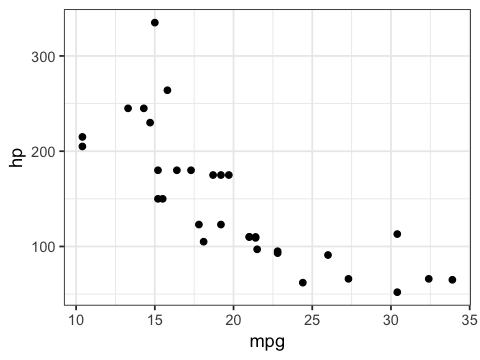

In [24]:
scatter.plot <- ggplot(mtcars, aes(x=mpg, y=hp)) + geom_point()
scatter.plot

Resize the Points by `Displacement (disp)`

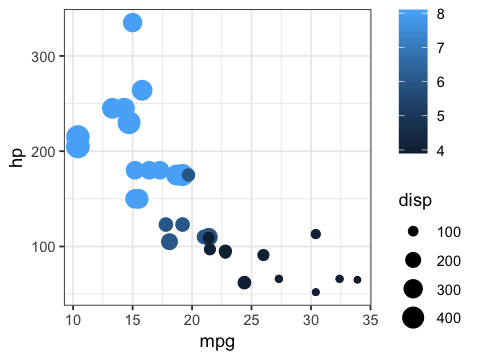

In [25]:
scatter.plot <- scatter.plot + geom_point(aes(col=cyl, size=disp))
scatter.plot

Add Smooth Line using LOESS algorithm

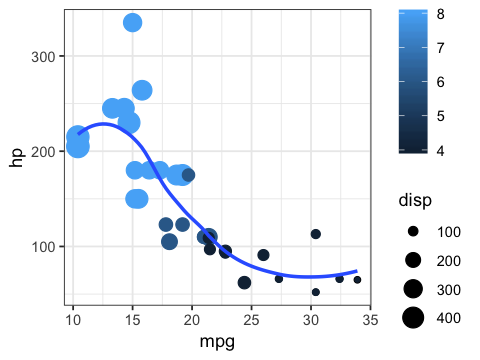

In [26]:
scatter.plot <- scatter.plot + geom_smooth(method="loess", se=F)
scatter.plot

Extend the X and Y Axis Limits a little

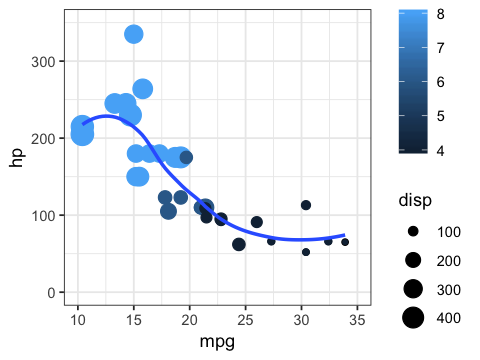

In [27]:
scatter.plot <- scatter.plot + xlim(c(10, 35)) + ylim(c(0, 350))
scatter.plot

Complete with Title and Labels

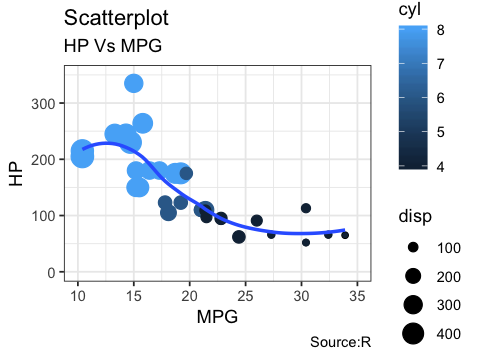

In [28]:
scatter.plot <- scatter.plot + labs(subtitle="HP Vs MPG", y="HP", x="MPG", 
                                    title="Scatterplot", caption = "Source:R")
scatter.plot

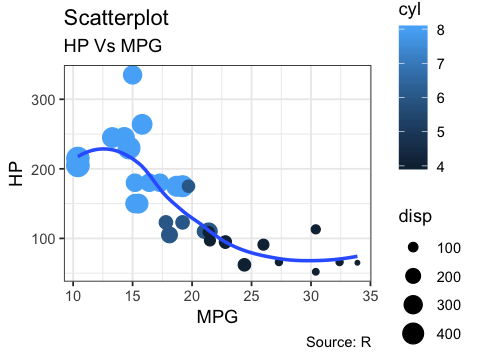

In [29]:
scatter.plot <- ggplot(mtcars, aes(x = mpg, y = hp)) + 
    geom_point(aes(col = cyl, size=disp)) +
    geom_smooth(method="loess", se = FALSE) +
    labs(subtitle="HP Vs MPG", y = "HP", x = "MPG",
         title="Scatterplot", caption = "Source: R")
scatter.plot

### SCATTER PLOT WITH ENCIRCLING

In [6]:
mtcars.circle <- mtcars[mtcars$hp >= 230,]

In [7]:
mtcars.plot <-  ggplot(mtcars, aes(x = mpg, y = hp)) + 
                geom_point(aes(col = cyl, size = disp)) + # draw points
                geom_smooth(method="loess", se = FALSE)
mtcars.plot

ERROR: Error in ggplot(mtcars, aes(x = mpg, y = hp)): could not find function "ggplot"


Add Circle

In [1]:
mtcars.plot <- mtcars.plot + 
               geom_encircle(aes(x = mpg, y = hp),
                             data = mtcars.circle, color = "red", 
                             size = 2, expand = 0.08)

ERROR: Error in eval(expr, envir, enclos): object 'mtcars.plot' not found


In [ ]:
labs(subtitle="HP Vs MPG",
                     y = "HP", x = "MPG", 
                     title="Scatterplot",
                     caption = "Source: R")